## Importing Librabries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Preprocessing & Cleaning

In [76]:
df = pd.read_csv('sales_data_sample.csv', sep=',', 
                 encoding='cp1252')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [77]:
df.shape

(2823, 25)

In [78]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [80]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [81]:
df.duplicated().sum()

0

In [82]:
df.drop(['ORDERNUMBER', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE',
         'PRODUCTCODE', 'PHONE', 'ADDRESSLINE2',
       'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 
       'CONTACTLASTNAME'], axis=1, inplace=True)

In [83]:
# Replace coded values with their month for 'MONTH_ID'
df['MONTH_ID'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                        5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                        9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
                       }, inplace=True)

In [84]:
df.sample(5)

,QUANTITYORDERED,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,DEALSIZE
996,49,6893.81,Shipped,4,Nov,2003,Vintage Cars,136,Super Scale Inc.,567 North Pendale Street,New Haven,USA,Medium
2597,46,3424.70,Shipped,1,Jan,2004,Ships,72,"Saveley & Henriot, Co.","2, rue du Commerce",Lyon,France,Medium
2621,23,2000.77,Shipped,4,Nov,2003,Classic Cars,101,"Classic Gift Ideas, Inc",782 First Street,Philadelphia,USA,Small
343,32,2042.88,Shipped,2,May,2003,Classic Cars,79,Marseille Mini Autos,"12, rue des Bouchers",Marseille,France,Small
2126,23,1543.30,Shipped,4,Oct,2003,Classic Cars,80,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,USA,Small


## Data Analysis & Visualization

### Q1. Which Year Had The Most Sales? 

In [85]:
def plot_sales(data, x_col, y_col, x_labels=None, title='Sales Over Time', xlabel="Time Period", ylabel='Sales (Millions)', color='teal'):
    """
    Plot a bar chart of sales data.
    
    Parameters:
    data(DataFrame): The data frame containing the sales data.
    x_col (str): The column name for the x-axis (e.g., years, months, quarters).
    y_col (str): The column name for the y-axis (sales).
    x_labels (list, optional): Custom labels for the x-axis ticks. Defaults to None.
    title (str, optional): The title of the plot. Defaults to 'Sales Over Time'.
    xlabel (str, optional): The label for the x-axis. Defaults to 'Time Period'.
    ylabel (str, optional): The label for the y-axis. Defaults to 'Sales (Millions)'.
    color (str, optional): The color of the bars. Defaults to 'teal'.
    """
    # Ensure the data is sorted by x_col
    data = data.sort_values(by=x_col)
    
    # Convert sales to millions
    data[y_col] = data[y_col] / 1e6
    
    # Set theme
    sns.set_theme(font_scale=1.0)

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the data
    bars = ax.bar(data[x_col], data[y_col], color=color)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Set custom x-axis labels if provided
    if x_labels:
        ax.set_xticks(data[x_col])
        ax.set_xticklabels(x_labels)
    else:
        ax.set_xticks(data[x_col])
        ax.set_xticklabels(data[x_col].astype(str))

    # Add bar labels
    for bar in bars:
        label = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, label + 0.05, round(label, 3), ha='center', va='bottom')

    plt.show()

In [86]:
df1 = df.groupby('YEAR_ID')["SALES"].sum().reset_index()
df1

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


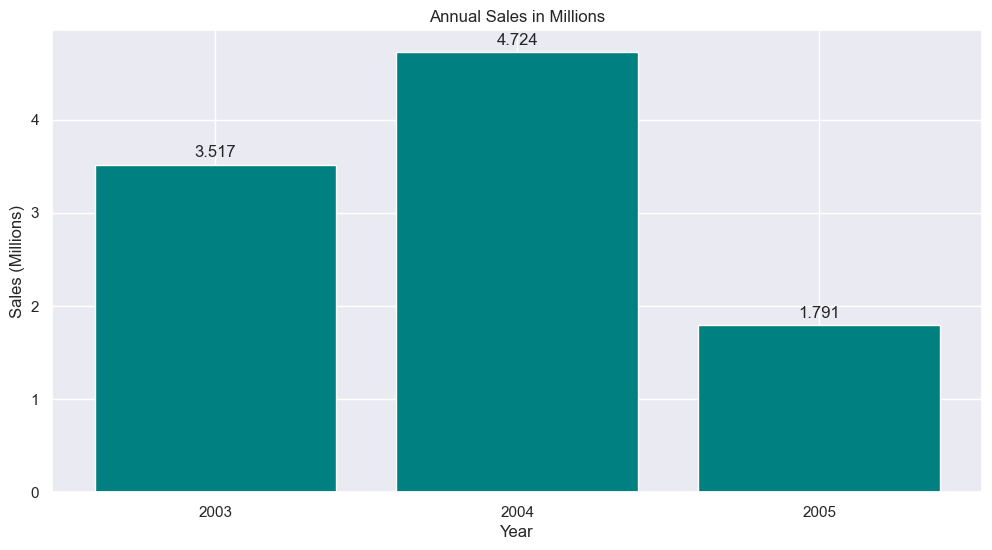

In [87]:
plot_sales(df1, 'YEAR_ID', 'SALES',  x_labels=['2003', '2004', '2005'], 
           title='Annual Sales in Millions', xlabel='Year')

This plot shows that, out the three years, 2024 had the highest revenue; however, the data for 2024 is limited to five months.

### Q2. Which Month Had The Most Sales?

In [88]:
df2 = df.groupby('MONTH_ID')['SALES'].sum().reset_index()

# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a  categorical type with the specified order
df2['MONTH_ID'] = pd.Categorical(df2['MONTH_ID'], categories=month_order,
                                ordered=True)

# Sort the dataframe by the MONTH_ID column
df2 = df2.sort_values('MONTH_ID').reset_index(drop=True)

df2.head(12)

,MONTH_ID,SALES
0,Jan,785874.44
1,Feb,810441.90
2,Mar,754501.39
3,Apr,669390.96
4,May,923972.56
5,Jun,454756.78
6,Jul,514875.97
7,Aug,659310.57
8,Sep,584724.27
9,Oct,1121215.22


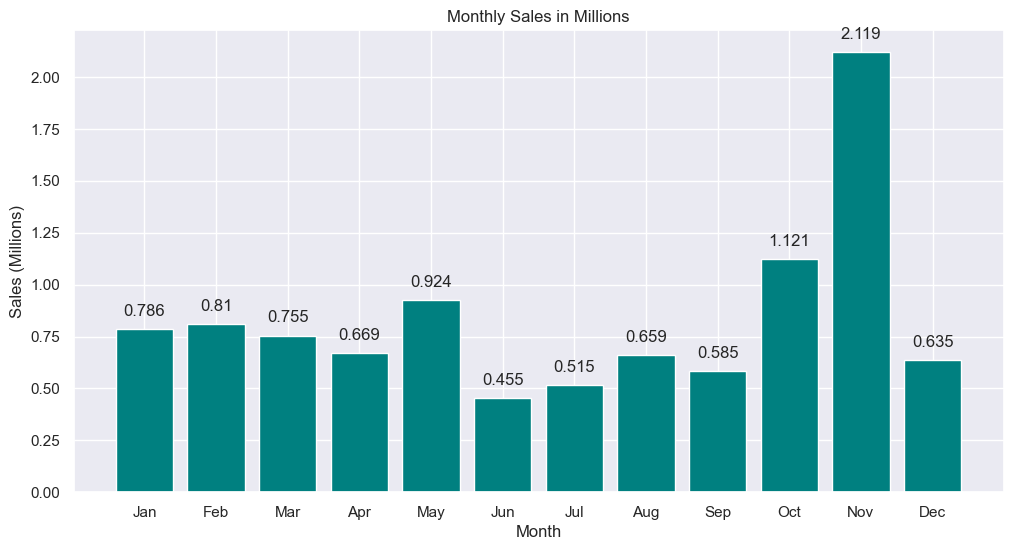

In [89]:
x_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plot_sales(df2, 'MONTH_ID', 'SALES',  x_labels=x_labels, 
           title='Monthly Sales in Millions', xlabel='Month')

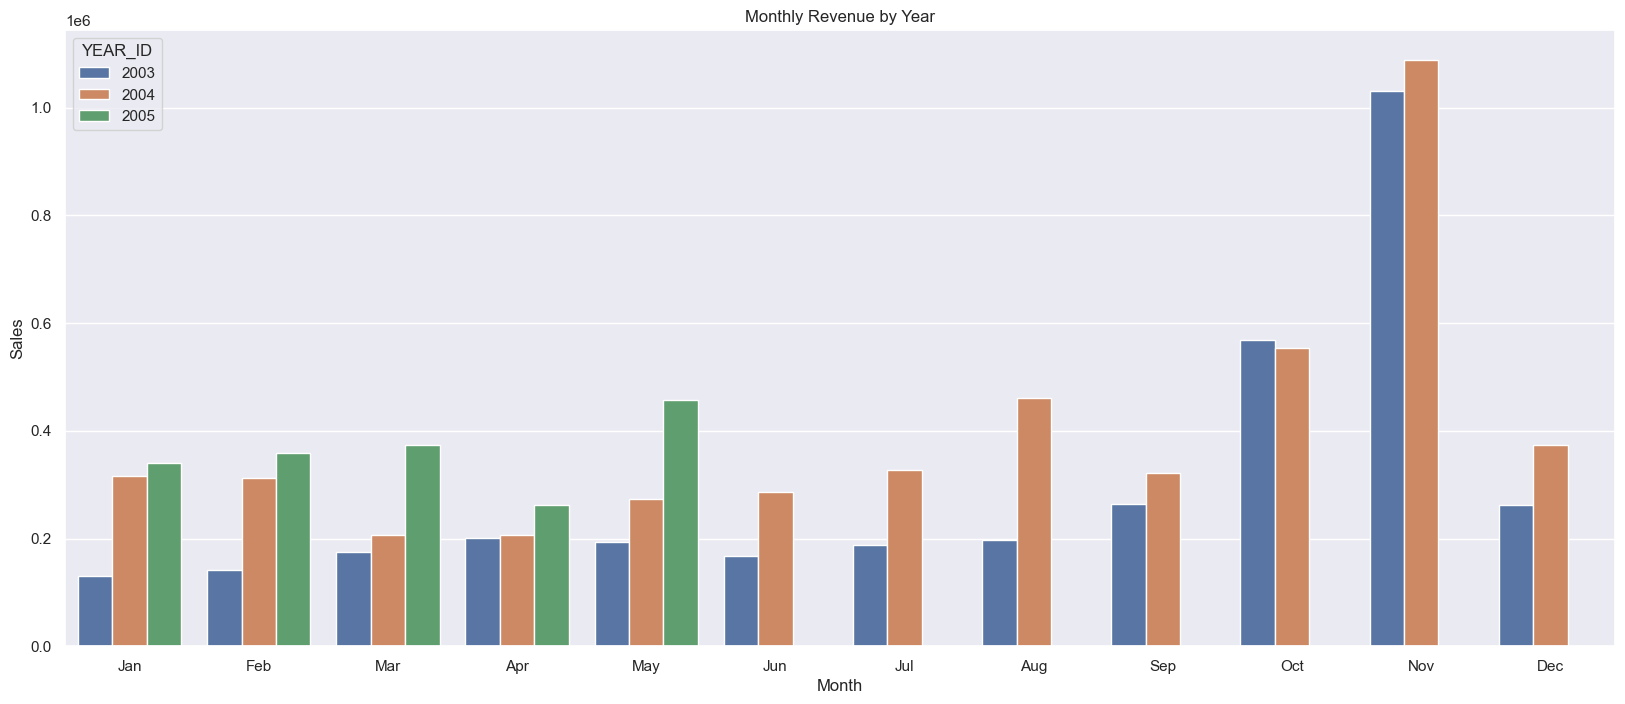

In [90]:
unique_months = df['MONTH_ID'].unique()
temp=pd.DataFrame()

# Create subplots for each year
for i, month in enumerate(unique_months):
    month_data = df[df['MONTH_ID'] == month]
    month_data = month_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    month_data['MONTH_ID'] = month
    temp = pd.concat([temp,month_data], ignore_index=True)
    
# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a  categorical type with the specified order
temp['MONTH_ID'] = pd.Categorical(temp['MONTH_ID'], categories=month_order,
                                ordered=True)

# Sort the dataframe by the MONTH_ID column
temp = temp.sort_values('MONTH_ID').reset_index(drop=True)
    
plt.figure(figsize=(20,8))
plt.title("Monthly Revenue by Year") # add title 
ax = sns.barplot(x='MONTH_ID',y='SALES',data=temp,hue='YEAR_ID')

# Set custom x-axis labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set x-axis label
ax.set_xlabel('Month')

# Set y-axis label
ax.set_ylabel('Sales')

plt.show()

November was the month with the highest revenue. We also observe that the revenue was rising annually in this case. Compared to 2004, revenue increased in the first five months of 2005. Thus, if we had enough information, we could conclude that 2005 was likely the year with the highest revenue.

### Q3. Which Country Had The Most Sales?

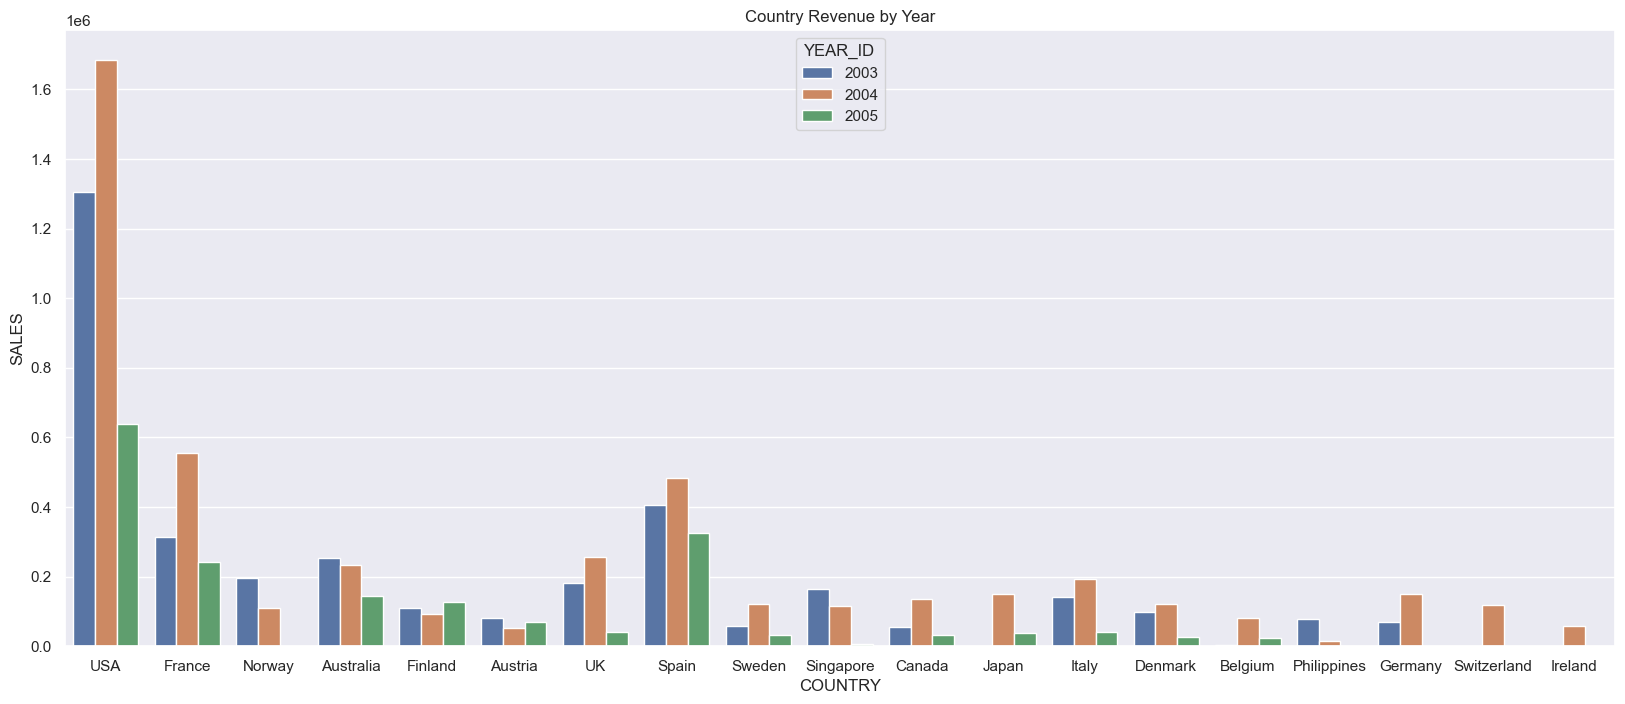

In [91]:
unique_countries = df['COUNTRY'].unique()
temp = pd.DataFrame()

# Create subplots for each year
for i, country in enumerate(unique_countries):
    country_data = df[df['COUNTRY'] == country]
    country_data=country_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    country_data['COUNTRY'] = country
    temp = pd.concat([temp,country_data], ignore_index=True)
plt.figure(figsize=(20,8))
plt.title("Country Revenue by Year") # add title 
a= sns.barplot(x='COUNTRY', y='SALES', data=temp, hue='YEAR_ID')
plt.xticks()
plt.show()

### Q4. Which Country Had More Sales Growth?

In [100]:
unique_countries = df['COUNTRY'].unique()
temp=pd.DataFrame()
# Create subplots for each year
for i, country in enumerate(unique_countries):
    country_data = df[df['COUNTRY'] == country]
    country_data=country_data.groupby('YEAR_ID')['SALES'].sum().reset_index()
    country_data['COUNTRY'] = country
    temp = pd.concat([temp,country_data], ignore_index=True)
temp.head()

,YEAR_ID,SALES,COUNTRY
0,2003,1305147.88,USA
1,2004,1685470.69,USA
2,2005,637364.26,USA
3,2003,312761.42,France
4,2004,555198.70,France


In [101]:
temp = temp[temp['YEAR_ID'] <= 2004]
temp.head()

,YEAR_ID,SALES,COUNTRY
0,2003,1305147.88,USA
1,2004,1685470.69,USA
3,2003,312761.42,France
4,2004,555198.70,France
6,2003,196532.60,Norway


In [102]:
# Calculate the growth rate
temp['GROWTH_RATE'] = temp.groupby('COUNTRY')['SALES'].pct_change(periods=1) * 100
temp.head()

,YEAR_ID,SALES,COUNTRY,GROWTH_RATE
0,2003,1305147.88,USA,NaN
1,2004,1685470.69,USA,29.140208
3,2003,312761.42,France,NaN
4,2004,555198.70,France,77.515085
6,2003,196532.60,Norway,NaN


In [103]:
temp = temp[temp['YEAR_ID'] == 2004]
temp.head()

,YEAR_ID,SALES,COUNTRY,GROWTH_RATE
1,2004,1685470.69,USA,29.140208
4,2004,555198.70,France,77.515085
7,2004,110931.10,Norway,-43.555878
9,2004,232396.68,Australia,-8.192393
12,2004,91575.69,Finland,-17.614058


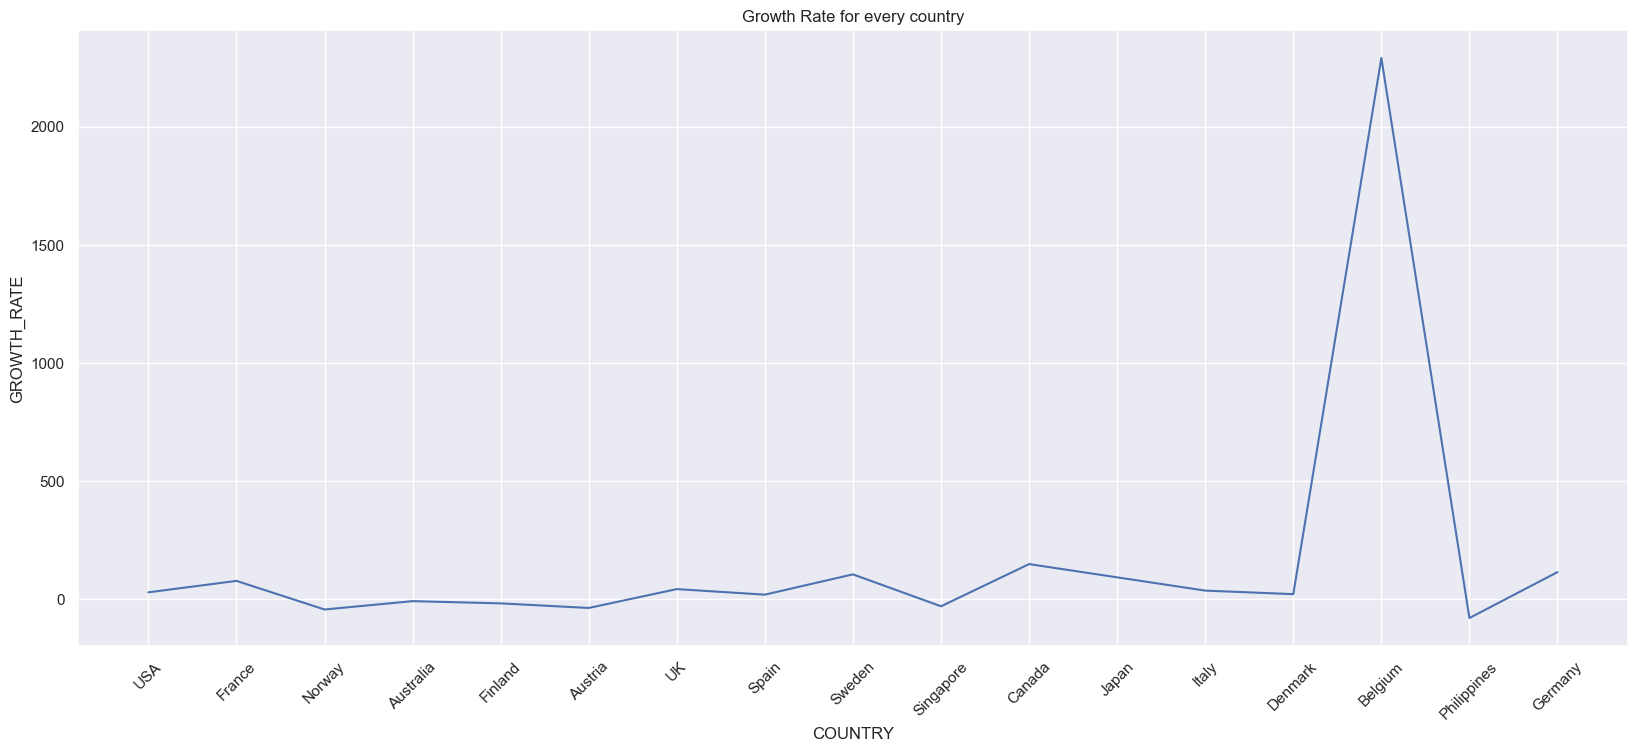

In [104]:
plt.figure(figsize=(20,8))
sns.lineplot(data=temp, x="COUNTRY", y="GROWTH_RATE")
plt.title('Growth Rate for every country')
plt.xticks(rotation=45);

Belgium had the most sales growth among others

### Q5. Which Item Had Sold The Most in 2003?

In [141]:
def plot_items(data, x_col, y_col, title, xlabel, ylabel, color='teal'):
    """
    Plot a bar chart of items data.
    
    Parameters:
    data(DataFrame): The data frame containing the sales data.
    x_col (str): The column name for the x-axis.
    y_col (str): The column name for the y-axis (Quantity).
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    color (str, optional): The color of the bars. Defaults to 'teal'.
    """
     # Set theme
    sns.set_theme(font_scale=1.0)

    # Create the figure and axes
    plt.figure(figsize=(12, 6))
    
    ax = sns.barplot(data=data, x=x_col, y=y_col)

    # Add title and labels
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, size=10)

    # Add bar labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    # Show the plot
    plt.show()

In [142]:
df5 = df['PRODUCTLINE'][df['YEAR_ID'] == 2003].value_counts().reset_index()
df5.head()

,PRODUCTLINE,count
0,Classic Cars,366
1,Vintage Cars,221
2,Trucks and Buses,110
3,Motorcycles,109
4,Planes,85


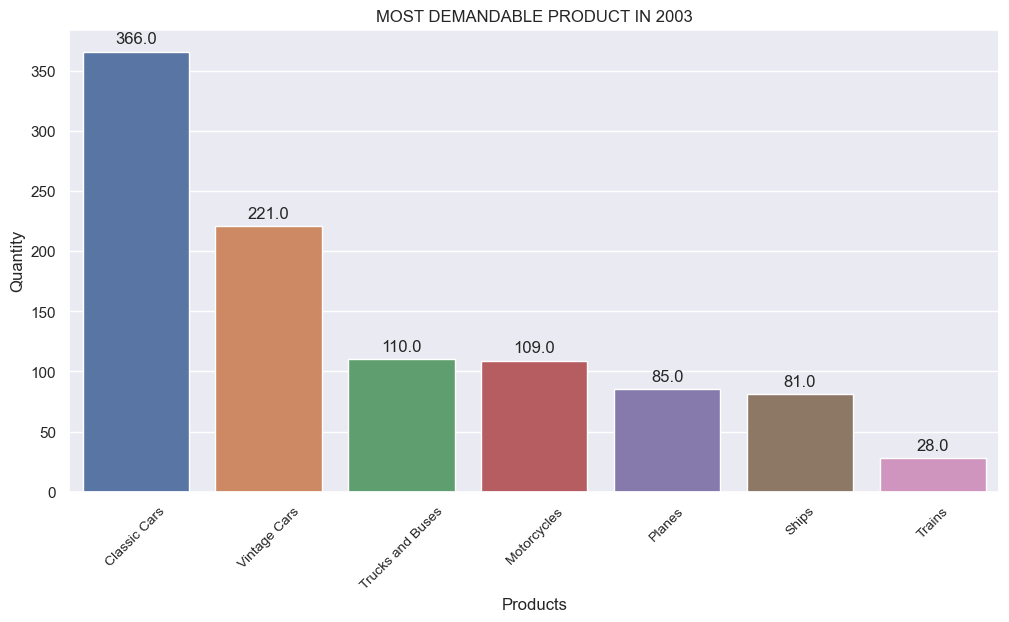

In [143]:
title= 'MOST DEMANDABLE PRODUCT IN 2003'
xlabel = 'Products'
ylabel= 'Quantity'

plot_items(data=df5, x_col='PRODUCTLINE', y_col='count', title=title, 
           xlabel=xlabel, ylabel=ylabel, color='teal')

### Q6. Which Item Had Sold The Most in 2004?

In [146]:
df6 = df['PRODUCTLINE'][df['YEAR_ID'] == 2004].value_counts().reset_index()
df6.head()

,PRODUCTLINE,count
0,Classic Cars,442
1,Vintage Cars,284
2,Motorcycles,164
3,Planes,161
4,Trucks and Buses,142


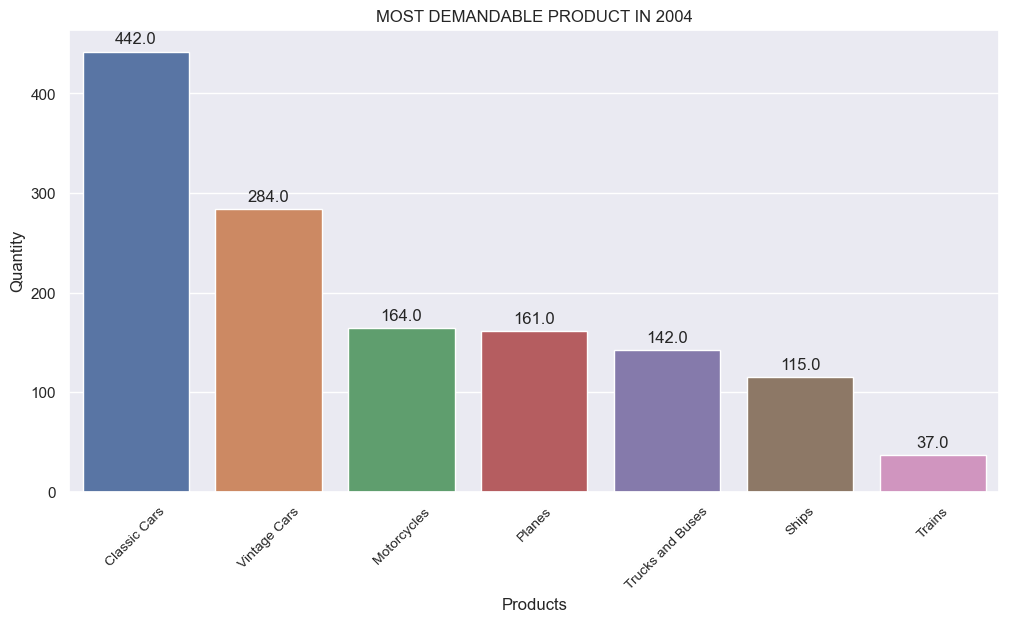

In [147]:
title= 'MOST DEMANDABLE PRODUCT IN 2004'
xlabel = 'Products'
ylabel= 'Quantity'

plot_items(data=df6, x_col='PRODUCTLINE', y_col='count', title=title, 
           xlabel=xlabel, ylabel=ylabel, color='teal')

### Q7. Who are the Top 20% Customers?

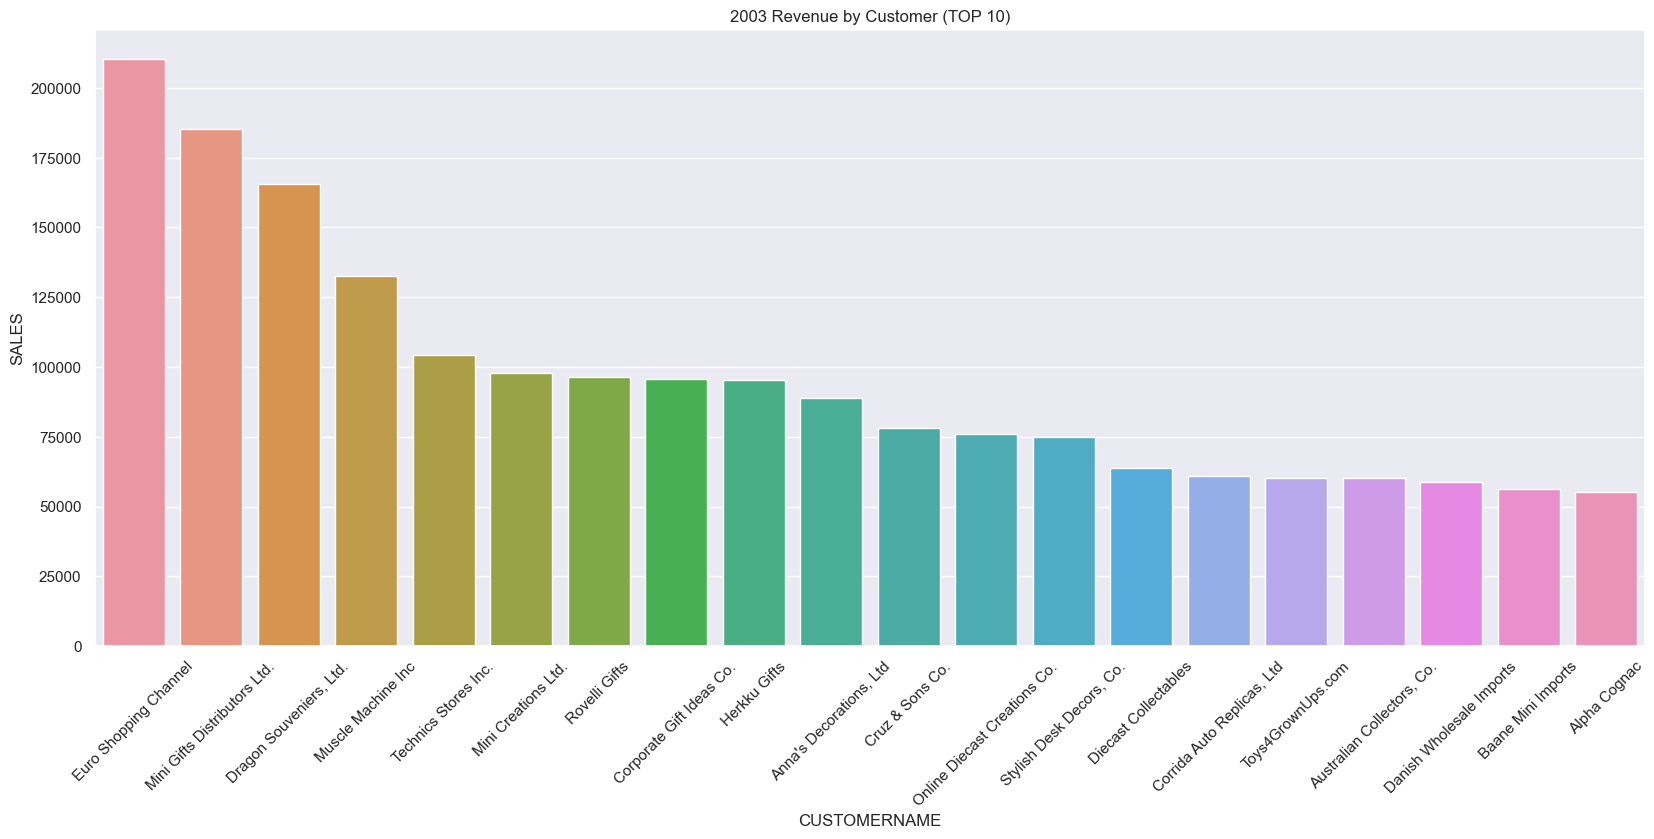

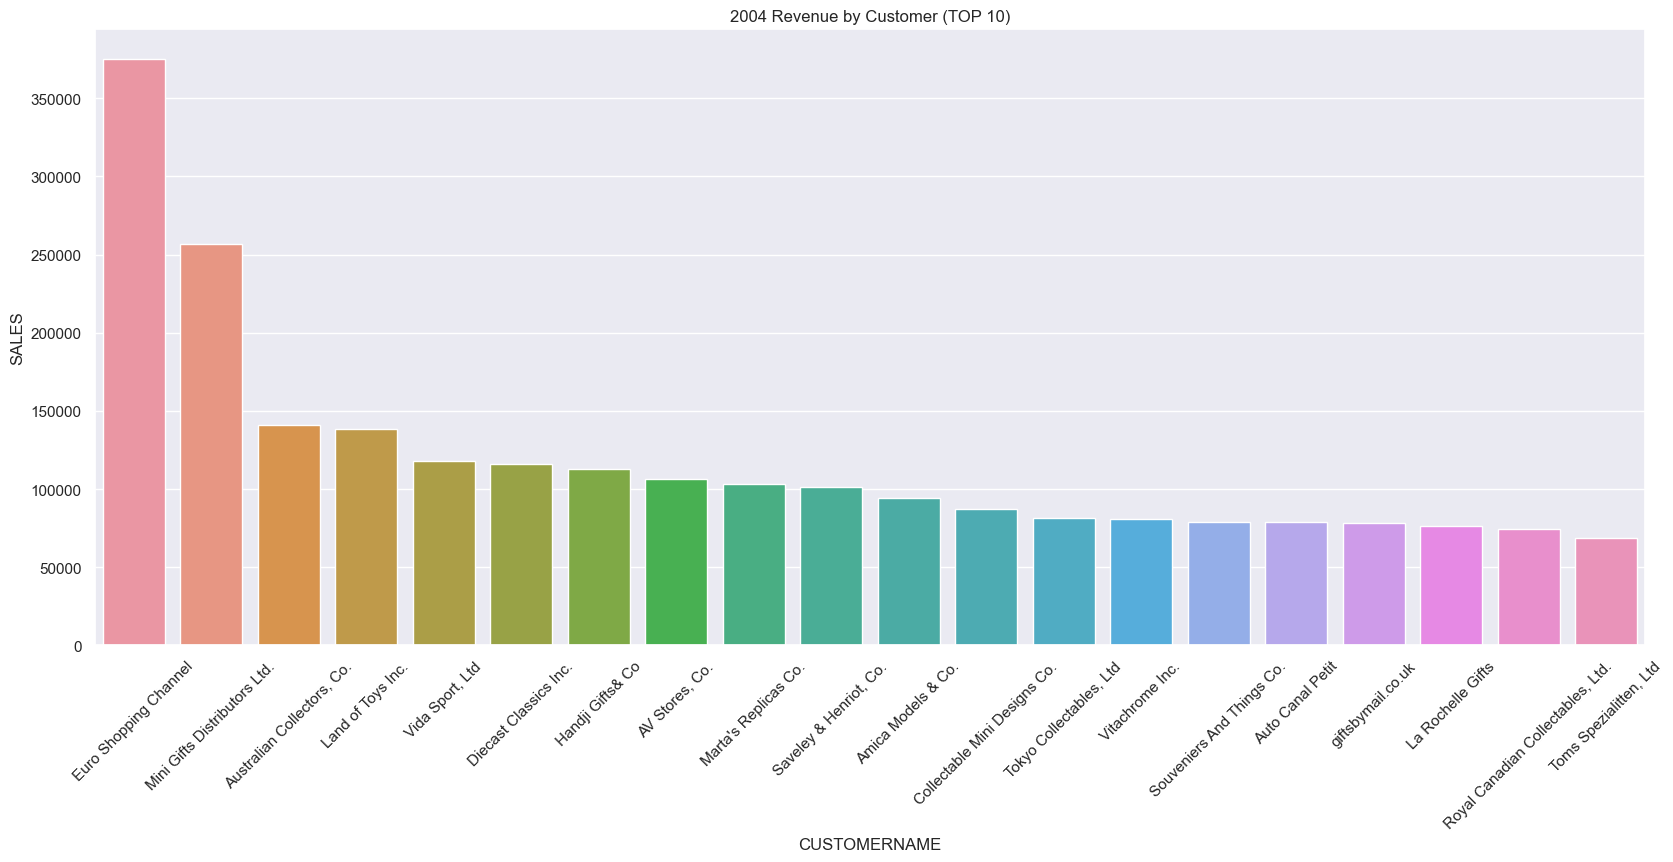

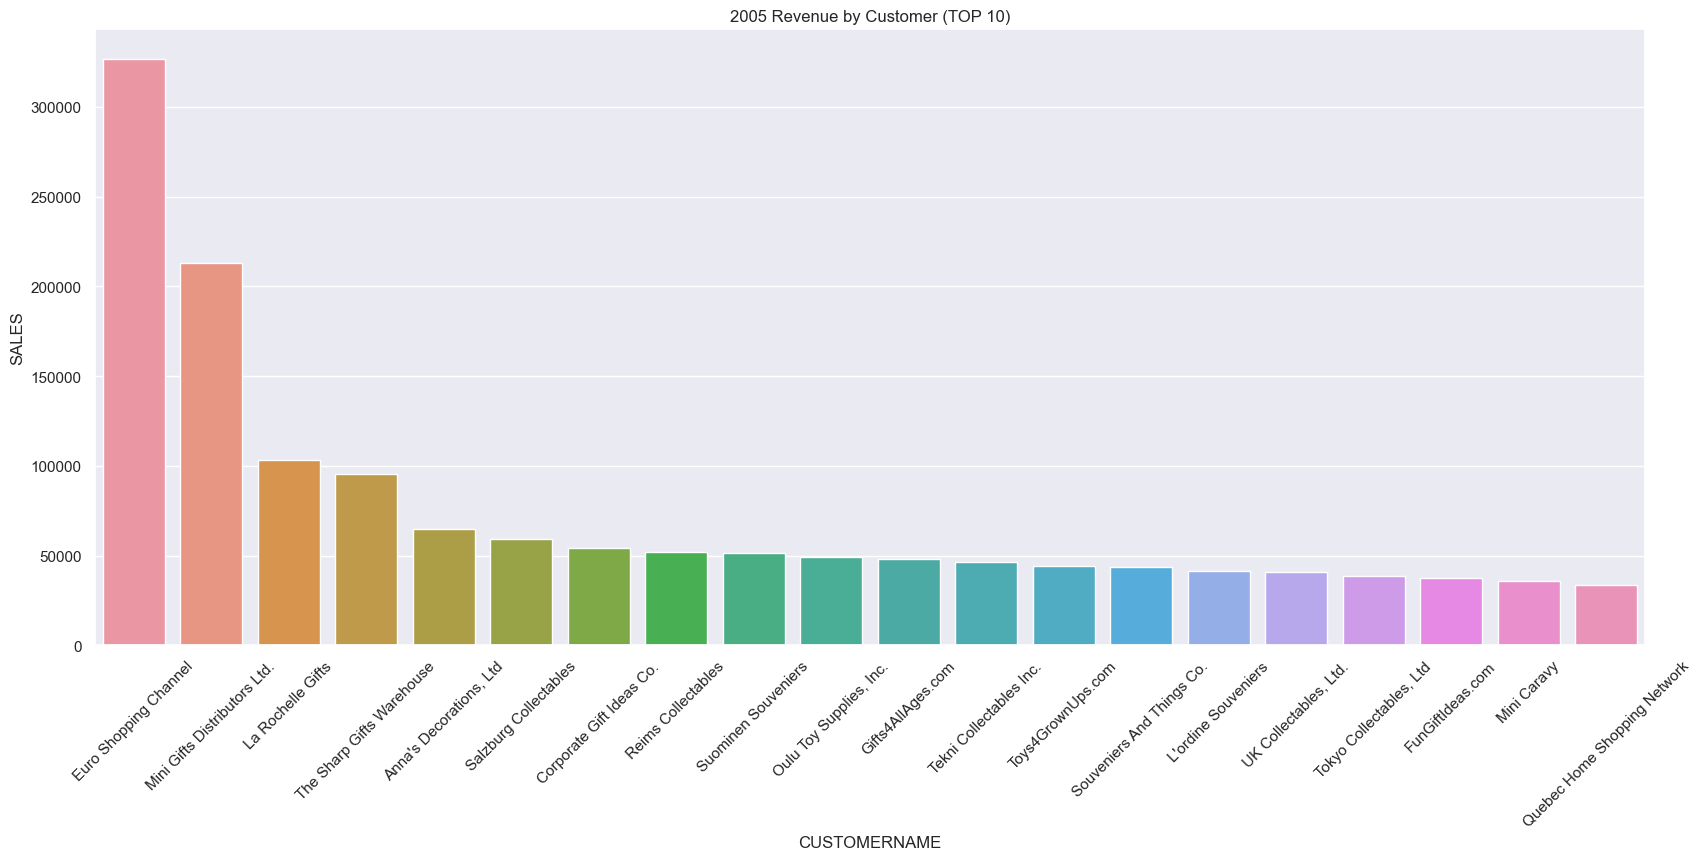

In [148]:
unique_years = df['YEAR_ID'].unique()

# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
    year_data['YEAR_ID'] = year
    plt.figure(figsize=(20,8))
    plt.title(str(year)+" REVENUE BY CUSTOMERS (TOP 10)") # add title 
    year_data =year_data.sort_values(by = "SALES", ascending=False)
    year_data=year_data.head(20)
    a= sns.barplot(x='CUSTOMERNAME',y='SALES',data=year_data,errorbar=None)
    plt.xticks(rotation = 45)
    plt.show()

### Q8. Which Amount of Revenue is Contributed by the Top 20% of Customers?

In [149]:
unique_years = df['YEAR_ID'].unique()
temp2003=pd.DataFrame()
temp2004=pd.DataFrame()
temp2005=pd.DataFrame()
# Create subplots for each year
for i, year in enumerate(unique_years):
    year_data = df[df['YEAR_ID'] == year]
    year_data=year_data.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).reset_index()
    year_data['YEAR_ID'] = year
    if(year == 2003):
        temp2003 = year_data
    elif(year == 2004):
        temp2004 = year_data
    else:
        temp2005 = year_data
label = ['Top 20%', 'Others']

In [150]:
temp2003['revenue_cum'] = temp2003['SALES'].cumsum()
temp2003['%revenue_cum'] = temp2003['revenue_cum']/temp2003['SALES'].sum()
n=int(0.20*len(temp2003.index))
temp2003.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,210227.58,2003,210227.58,0.059775
1,Mini Gifts Distributors Ltd.,185128.12,2003,395355.70,0.112413
2,"Dragon Souveniers, Ltd.",165686.20,2003,561041.90,0.159524
3,Muscle Machine Inc,132778.24,2003,693820.14,0.197277
4,Technics Stores Inc.,104337.30,2003,798157.44,0.226944
5,Mini Creations Ltd.,97929.83,2003,896087.27,0.254789
6,Rovelli Gifts,96259.03,2003,992346.30,0.282159
7,Corporate Gift Ideas Co.,95678.88,2003,1088025.18,0.309364
8,Herkku Gifts,95277.18,2003,1183302.36,0.336454
9,"Anna's Decorations, Ltd",88983.71,2003,1272286.07,0.361755


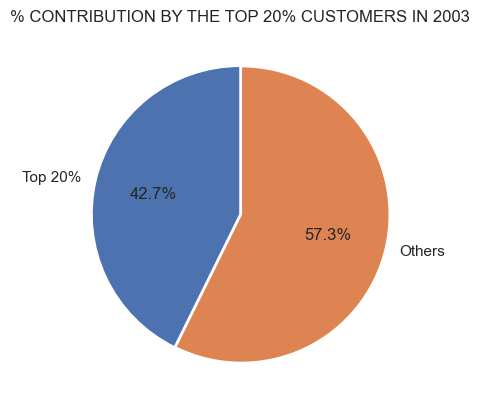

In [151]:
data = [(temp2003.head(n)['%revenue_cum'].max())*100, (1-temp2003.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% CONTRIBUTION BY THE TOP 20% CUSTOMERS IN 2003')
plt.show()

In [152]:
temp2004['revenue_cum'] = temp2004['SALES'].cumsum()
temp2004['%revenue_cum'] = temp2004['revenue_cum']/temp2004['SALES'].sum()
n=int(0.20*len(temp2004.index))
temp2004.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,375268.36,2004,375268.36,0.079436
1,Mini Gifts Distributors Ltd.,256474.26,2004,631742.62,0.133726
2,"Australian Collectors, Co.",140859.57,2004,772602.19,0.163543
3,Land of Toys Inc.,138285.68,2004,910887.87,0.192815
4,"Vida Sport, Ltd",117713.56,2004,1028601.43,0.217732
5,Diecast Classics Inc.,115971.34,2004,1144572.77,0.242281
6,Handji Gifts& Co,112911.15,2004,1257483.92,0.266181
7,"AV Stores, Co.",106789.89,2004,1364273.81,0.288786
8,Marta's Replicas Co.,103080.38,2004,1467354.19,0.310606
9,"Saveley & Henriot, Co.",101339.14,2004,1568693.33,0.332057


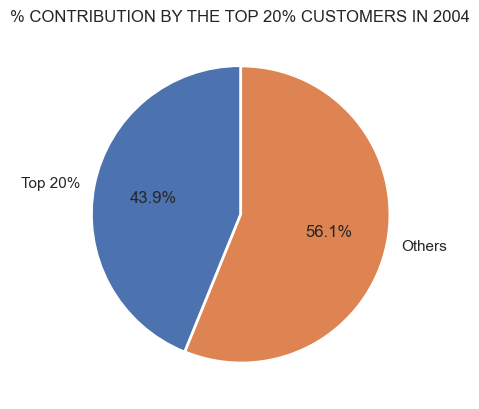

In [153]:
data = [(temp2004.head(n)['%revenue_cum'].max())*100, (1-temp2004.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% CONTRIBUTION BY THE TOP 20% CUSTOMERS IN 2004')
plt.show()

In [154]:
temp2005['revenue_cum'] = temp2005['SALES'].cumsum()
temp2005['%revenue_cum'] = temp2005['revenue_cum']/temp2005['SALES'].sum()
n=int(0.20*len(temp2005.index))
temp2005.head(n)

,CUSTOMERNAME,SALES,YEAR_ID,revenue_cum,%revenue_cum
0,Euro Shopping Channel,326798.17,2005,326798.17,0.182417
1,Mini Gifts Distributors Ltd.,213255.68,2005,540053.85,0.301456
2,La Rochelle Gifts,103402.09,2005,643455.94,0.359174
3,The Sharp Gifts Warehouse,95409.93,2005,738865.87,0.412432
4,"Anna's Decorations, Ltd",65012.42,2005,803878.29,0.448721
5,Salzburg Collectables,59475.10,2005,863353.39,0.481920
6,Corporate Gift Ideas Co.,54203.62,2005,917557.01,0.512176
7,Reims Collectables,52029.07,2005,969586.08,0.541219


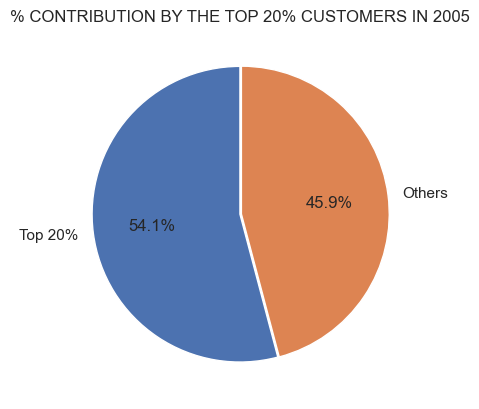

In [155]:
data = [(temp2005.head(n)['%revenue_cum'].max())*100, (1-temp2005.head(n)['%revenue_cum'].max())*100]
#fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, autopct='%1.1f%%', explode=(0, 0.01), startangle=90)
plt.title('% CONTRIBUTION BY THE TOP 20% CUSTOMERS IN 2005')
plt.show()